In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

In [33]:
import pandas as pd
import numpy as np
import sys # 최대 정수를 가져오기위해
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 로지스틱 회귀분석 (이진분류)
## 1. 데이터 셋 생성 & 전처리
- 엑셀 -> 데이터프레임 -> ?처리 (결측치로 전환하여 결측치처리) -> X,y 분리 -> X변수의 scale 조정
```
age 나이 (세)
sex 성별
1 : 남성
0 : 여성
cp (chest pain type) 가슴 통증(흉통) 타입
1 : typical angina (전형적 협심증)
2 : atypical angina (비전형적 협심증)
3 : non-anginal pain (심장 관련이 아닌 흉통)
4 : asymptomatic (증상 없음)
treshtbps (resting blood pressure) 안정 시 수축기 혈압 (mm Hg)
병원 처음 내원했을 때 잰 혈압이라고 보면 됨
chol (serum cholesterol) 혈청 콜레스테롤 수치 (mg/dl)
여기 보니까 ?가 있어서, 일부 결측값이 문자로 들어가 있는 상태야
fbs (fasting blood sugar) 공복 혈당 > 120 mg/dl 여부
1 : 공복 혈당 120 초과 (고혈당)
0 : 아니면 0
restecg (resting electrocardiographic results) 안정시 심전도 결과
0 : 정상
1 : ST-T wave 이상 (ST-T 파 이상, T wave 반전 등)
2 : LVH 가능성 (좌심실 비대 소견 등)
thalach (maximum heart rate achieved) 운동 검사에서 기록된 최대 심박수
exang (exercise induced angina) 운동으로 유발된 협심증 여부
1 : 운동 시 흉통 있음
0 : 없음
oldpeak 운동으로 인해 발생한 ST 절 하강 정도 (depression)
숫자가 클수록 보통 심장 허혈 가능성↑로 봄
slope (slope of peak exercise ST segment) 운동 시 ST 세그먼트 기울기
1 : upsloping (상승형)
2 : flat (평평)
3 : downsloping (하강형)
ca 조영제(조영술)에서 보이는 주요 관상동맥 수 (0~3)
0이면 문제 있는 관상동맥이 없는 것,
숫자가 클수록 문제 있는 혈관 수가 많다고 보면 됨
여기에도 ? 값 좀 섞여 있음
hsl (보통 다른 데이터셋에서는 thal) 아마 **thalassemia 관련 검사 결과(thal)**를 의미
3 : normal
6 : fixed defect (고정 결손)
7 : reversible defect (가역 결손)
여기도 숫자가 이런 패턴이라, 같은 의미로 봐도 될 듯
heartDisease (target) 심장질환 유무 (목표 변수)
```

In [9]:
# 아나콘다 프롬프트에서 ml-dl-nlp 가상환경으로 이동후 pip install openpyxl
df = pd.read_excel('data/heart-disease.xlsx', sheet_name='processed.cleveland')
df

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshtbps     303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hsl           303 non-null    object 
 13  heartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [11]:
df.isin(['?']).sum()

age             0
sex             0
cp              0
treshtbps       0
chol            1
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              4
hsl             2
heartDisease    0
dtype: int64

In [14]:
# ?가 포함된 데이터 추출하기
df[(df['chol']=='?') | (df['ca']=='?') | (df['hsl']=='?')]

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [17]:
# ?를 결측치(np.nan)로 대체 -> 결측치처리(삭제)
df.replace('?', np.nan, inplace=True)
df[(df['chol']=='?') | (df['ca']=='?') | (df['hsl']=='?')]

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease


In [18]:
df[df.isna().any(axis=1)]

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
2,67,1,4,120,NaN,0,2,129,1,2.6,2,2.0,7.0,1
87,53,0,3,128,216.0,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223.0,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247.0,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204.0,1,0,156,1,1.0,2,0.0,NaN,1
287,58,1,2,125,220.0,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175.0,0,0,173,0,0.0,1,NaN,3.0,0


In [20]:
#결측ㅇ치 처리: 대체(fillna), 삭제(dropna)
df = df.dropna(how='any') #결측치가 한열이라도 잇으면 삭제

In [21]:
df.isna().sum()

age             0
sex             0
cp              0
treshtbps       0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hsl             0
heartDisease    0
dtype: int64

In [23]:
# target 변수의 분포가 균형을 이루는지
df['heartDisease'].value_counts() / df.shape[0]

0    0.540541
1    0.459459
Name: heartDisease, dtype: float64

In [27]:
# 입력(독립)변수와 타겟(종속, 출력) 변수 분리
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values # 2차원 numpy 배열(train_test_split 사용을 위해)
X[0], y[0]

(array([ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
          2.3,   3. ,   0. ,   6. ]),
 array([0], dtype=int64))

In [31]:
# 입력변수 X의 스케일 조정 (Standard)
scaler_x = StandardScaler()
scaled_X = scaler_x.fit_transform(X)
scaled_X[0]

array([ 0.94228535,  0.69282032, -2.23679346,  0.74744089, -0.27722838,
        2.42563825,  1.02052624,  0.01445126, -0.69282032,  1.07483887,
        2.26408737, -0.71842092,  0.66026226])

In [32]:
# 입력변수 X의 스케일 조정 (MinMax)
scaler_x = MinMaxScaler()
scaled_X = scaler_x.fit_transform(X)
scaled_X[0]

array([0.70833333, 1.        , 0.        , 0.48113208, 0.24429224,
       1.        , 1.        , 0.60305344, 0.        , 0.37096774,
       1.        , 0.        , 0.75      ])

In [44]:
# scaled_X,y 를 학습셋:테스트셋 = 7:3으로 분할
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((207, 13), (89, 13), (207, 1), (89, 1))

In [45]:
# 심장병 음성/양성의 비율
print(pd.DataFrame(y).value_counts(normalize=True))
print(pd.DataFrame(y_train).value_counts(normalize=True))
print(pd.DataFrame(y_test).value_counts(normalize=True))

0    0.540541
1    0.459459
dtype: float64
0    0.541063
1    0.458937
dtype: float64
0    0.539326
1    0.460674
dtype: float64


## 2. 모델생성
- 입력 13, 출력 1
- 학습과정 설정 및 학습
    - 그래프를 보고, 과적합 줄이기 추가할 수 있음

In [48]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import Recall, Precision

In [54]:
model = Sequential()
model.add(Dense(units=32, input_shape=(13,), activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

In [56]:
hist = model.fit(x_train, y_train, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 39ms/step - loss: 0.8563 - accuracy: 0.4061 - precision_1: 0.4061 - recall_1: 1.0000 - val_loss: 0.6402 - val_accuracy: 0.6667 - val_precision_1: 0.6667 - val_recall_1: 1.0000
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.7905 - accuracy: 0.3879 - precision_1: 0.3951 - recall_1: 0.9552 - val_loss: 0.6355 - val_accuracy: 0.6667 - val_precision_1: 0.6667 - val_recall_1: 1.0000
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7560 - accuracy: 0.4242 - precision_1: 0.4136 - recall_1: 1.0000 - val_loss: 0.6364 - val_accuracy: 0.6667 - val_precision_1: 0.6667 - val_recall_1: 1.0000
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7447 - accuracy: 0.4242 - precision_1: 0.4103 - recall_1: 0.9552 - val_loss: 0.6367 - val_accuracy: 0.6667 - val_precision_1: 0.6667 - val_recall_1: 1.0000
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7298 - acc

Epoch 37/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6071 - accuracy: 0.7455 - precision_1: 0.6582 - recall_1: 0.7761 - val_loss: 0.5394 - val_accuracy: 0.9048 - val_precision_1: 1.0000 - val_recall_1: 0.8571
Epoch 38/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5900 - accuracy: 0.7939 - precision_1: 0.7200 - recall_1: 0.8060 - val_loss: 0.5267 - val_accuracy: 0.9048 - val_precision_1: 1.0000 - val_recall_1: 0.8571
Epoch 39/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6168 - accuracy: 0.7394 - precision_1: 0.6538 - recall_1: 0.7612 - val_loss: 0.5260 - val_accuracy: 0.9048 - val_precision_1: 1.0000 - val_recall_1: 0.8571
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5891 - accuracy: 0.7576 - precision_1: 0.6753 - recall_1: 0.7761 - val_loss: 0.5231 - val_accuracy: 0.9048 - val_precision_1: 1.0000 - val_recall_1: 0.8571
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6060 -

Epoch 73/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4868 - accuracy: 0.7939 - precision_1: 0.7538 - recall_1: 0.7313 - val_loss: 0.3668 - val_accuracy: 0.8571 - val_precision_1: 1.0000 - val_recall_1: 0.7857
Epoch 74/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4570 - accuracy: 0.8121 - precision_1: 0.7812 - recall_1: 0.7463 - val_loss: 0.3741 - val_accuracy: 0.8333 - val_precision_1: 1.0000 - val_recall_1: 0.7500
Epoch 75/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4729 - accuracy: 0.8485 - precision_1: 0.8387 - recall_1: 0.7761 - val_loss: 0.3697 - val_accuracy: 0.8333 - val_precision_1: 1.0000 - val_recall_1: 0.7500
Epoch 76/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4736 - accuracy: 0.8000 - precision_1: 0.7931 - recall_1: 0.6866 - val_loss: 0.3598 - val_accuracy: 0.8571 - val_precision_1: 1.0000 - val_recall_1: 0.7857
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4880 -

6/6 [==============================] - 0s 6ms/step - loss: 0.4119 - accuracy: 0.8606 - precision_1: 0.8548 - recall_1: 0.7910 - val_loss: 0.3125 - val_accuracy: 0.8810 - val_precision_1: 1.0000 - val_recall_1: 0.8214
Epoch 109/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3847 - accuracy: 0.8788 - precision_1: 0.8852 - recall_1: 0.8060 - val_loss: 0.3141 - val_accuracy: 0.8810 - val_precision_1: 1.0000 - val_recall_1: 0.8214
Epoch 110/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4084 - accuracy: 0.8545 - precision_1: 0.8413 - recall_1: 0.7910 - val_loss: 0.3293 - val_accuracy: 0.8571 - val_precision_1: 1.0000 - val_recall_1: 0.7857
Epoch 111/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3826 - accuracy: 0.8606 - precision_1: 0.8667 - recall_1: 0.7761 - val_loss: 0.3453 - val_accuracy: 0.8333 - val_precision_1: 1.0000 - val_recall_1: 0.7500
Epoch 112/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3872 - accuracy

6/6 [==============================] - 0s 6ms/step - loss: 0.3799 - accuracy: 0.8788 - precision_1: 0.8730 - recall_1: 0.8209 - val_loss: 0.2950 - val_accuracy: 0.9048 - val_precision_1: 1.0000 - val_recall_1: 0.8571
Epoch 144/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy: 0.8788 - precision_1: 0.8730 - recall_1: 0.8209 - val_loss: 0.2995 - val_accuracy: 0.9048 - val_precision_1: 1.0000 - val_recall_1: 0.8571
Epoch 145/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3971 - accuracy: 0.8545 - precision_1: 0.8525 - recall_1: 0.7761 - val_loss: 0.2995 - val_accuracy: 0.9048 - val_precision_1: 1.0000 - val_recall_1: 0.8571
Epoch 146/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3459 - accuracy: 0.8606 - precision_1: 0.8793 - recall_1: 0.7612 - val_loss: 0.2999 - val_accuracy: 0.9048 - val_precision_1: 1.0000 - val_recall_1: 0.8571
Epoch 147/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3866 - accuracy

6/6 [==============================] - 0s 6ms/step - loss: 0.3455 - accuracy: 0.8606 - precision_1: 0.8667 - recall_1: 0.7761 - val_loss: 0.3002 - val_accuracy: 0.8810 - val_precision_1: 1.0000 - val_recall_1: 0.8214
Epoch 179/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3901 - accuracy: 0.8727 - precision_1: 0.8833 - recall_1: 0.7910 - val_loss: 0.3108 - val_accuracy: 0.8810 - val_precision_1: 1.0000 - val_recall_1: 0.8214
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3576 - accuracy: 0.8909 - precision_1: 0.9153 - recall_1: 0.8060 - val_loss: 0.3028 - val_accuracy: 0.8810 - val_precision_1: 1.0000 - val_recall_1: 0.8214
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3534 - accuracy: 0.8545 - precision_1: 0.8644 - recall_1: 0.7612 - val_loss: 0.3020 - val_accuracy: 0.8810 - val_precision_1: 1.0000 - val_recall_1: 0.8214
Epoch 182/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3599 - accuracy

In [52]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

## 3. 모델평가(그래프, 평가, 혼돈행렬)

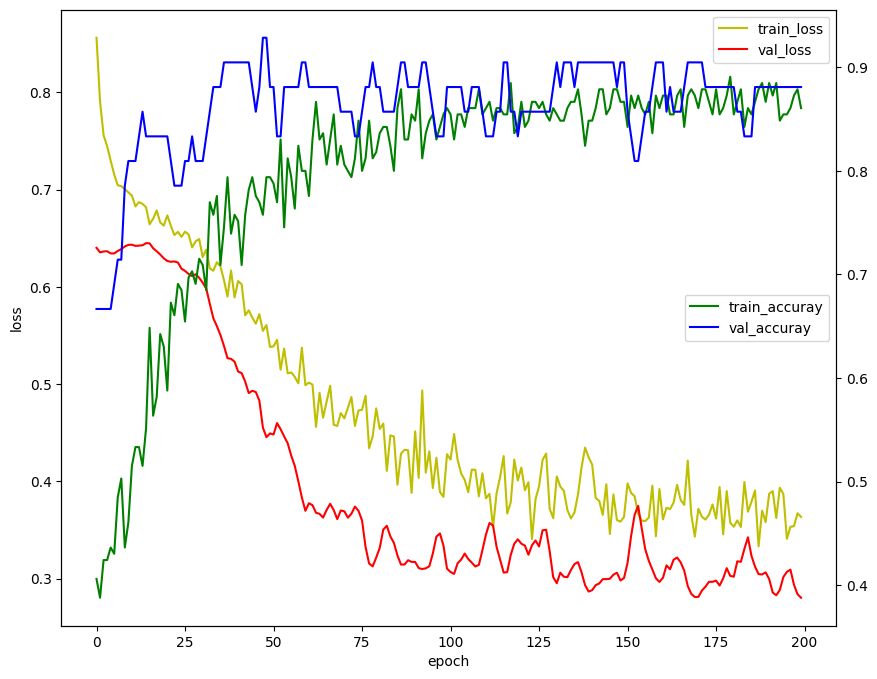

In [57]:
import matplotlib.pyplot as plt
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuray')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuray')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')
loss_ax.legend(loc='upper right')
acc_ax.legend(loc='center right')
plt.show()

In [60]:
score = model.evaluate(x_test, y_test)
print('model loss :', score[0])
print('model accuracy :', score[1])
print('model precision :', score[2])
print('model recall :', score[3])

3/3 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8090 - precision_1: 0.8333 - recall_1: 0.7317
model loss : 0.4813043475151062
model accuracy : 0.8089887499809265
model precision : 0.8333333134651184
model recall : 0.7317073345184326


In [77]:
# 교차표(혼동행렬)
y_hat = (model.predict(x_test)>0.5).astype(int)
y_hat.shape, y_test.shape

3/3 [==============================] - 0s 2ms/step


((89, 1), (89, 1))

In [79]:
confusion_matrix(y_test, y_hat)

array([[42,  6],
       [11, 30]], dtype=int64)

## 4. 모델사용

In [80]:
x_test[0]

array([0.66666667, 1.        , 0.        , 0.37735849, 0.24657534,
       0.        , 0.        , 0.5648855 , 0.        , 0.41935484,
       0.5       , 0.66666667, 0.        ])

In [83]:
model.predict(x_test[0].reshape(-1,13))

1/1 [==============================] - 0s 15ms/step


array([[0.27562305]], dtype=float32)

# 분류분석

## 1. 데이터 셋 생성 & 전처리
- 앞에 만들었던 x_train, y_train, x_test, y_test를 사용
    - y_train과 y_test 원핫인코딩

In [103]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((207, 2), (89, 2))

## 2. 모델 생성

In [90]:
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='tanh'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                448       
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,130
Trainable params: 1,130
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

In [92]:
hist = model.fit(x_train, Y_train, epochs=200, validation_split=0.2)

Epoch 1/200
6/6 [==============================] - 1s 40ms/step - loss: 0.7146 - accuracy: 0.4121 - precision_3: 0.4121 - recall_3: 0.4121 - val_loss: 0.6651 - val_accuracy: 0.6429 - val_precision_3: 0.6429 - val_recall_3: 0.6429
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.5333 - precision_3: 0.5333 - recall_3: 0.5333 - val_loss: 0.6653 - val_accuracy: 0.7143 - val_precision_3: 0.7143 - val_recall_3: 0.7143
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6719 - accuracy: 0.6970 - precision_3: 0.6970 - recall_3: 0.6970 - val_loss: 0.6647 - val_accuracy: 0.5952 - val_precision_3: 0.5952 - val_recall_3: 0.5952
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6561 - accuracy: 0.7091 - precision_3: 0.7091 - recall_3: 0.7091 - val_loss: 0.6530 - val_accuracy: 0.6190 - val_precision_3: 0.6190 - val_recall_3: 0.6190
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6406 - acc

Epoch 37/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3547 - accuracy: 0.8545 - precision_3: 0.8545 - recall_3: 0.8545 - val_loss: 0.3577 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 38/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3515 - accuracy: 0.8545 - precision_3: 0.8545 - recall_3: 0.8545 - val_loss: 0.3633 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 39/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3504 - accuracy: 0.8545 - precision_3: 0.8545 - recall_3: 0.8545 - val_loss: 0.3702 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3501 - accuracy: 0.8606 - precision_3: 0.8606 - recall_3: 0.8606 - val_loss: 0.3689 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3484 -

Epoch 73/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3198 - accuracy: 0.8606 - precision_3: 0.8606 - recall_3: 0.8606 - val_loss: 0.3251 - val_accuracy: 0.8571 - val_precision_3: 0.8571 - val_recall_3: 0.8571
Epoch 74/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3219 - accuracy: 0.8545 - precision_3: 0.8545 - recall_3: 0.8545 - val_loss: 0.3259 - val_accuracy: 0.8571 - val_precision_3: 0.8571 - val_recall_3: 0.8571
Epoch 75/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3221 - accuracy: 0.8667 - precision_3: 0.8667 - recall_3: 0.8667 - val_loss: 0.3374 - val_accuracy: 0.8571 - val_precision_3: 0.8571 - val_recall_3: 0.8571
Epoch 76/200
6/6 [==============================] - 0s 8ms/step - loss: 0.3191 - accuracy: 0.8606 - precision_3: 0.8606 - recall_3: 0.8606 - val_loss: 0.3209 - val_accuracy: 0.8571 - val_precision_3: 0.8571 - val_recall_3: 0.8571
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3208 -

6/6 [==============================] - 0s 6ms/step - loss: 0.3054 - accuracy: 0.8545 - precision_3: 0.8545 - recall_3: 0.8545 - val_loss: 0.2982 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 109/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3026 - accuracy: 0.8545 - precision_3: 0.8545 - recall_3: 0.8545 - val_loss: 0.3173 - val_accuracy: 0.8571 - val_precision_3: 0.8571 - val_recall_3: 0.8571
Epoch 110/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3070 - accuracy: 0.8788 - precision_3: 0.8788 - recall_3: 0.8788 - val_loss: 0.3615 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 111/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3011 - accuracy: 0.8848 - precision_3: 0.8848 - recall_3: 0.8848 - val_loss: 0.3215 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 112/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2986 - accuracy

6/6 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.9030 - precision_3: 0.9030 - recall_3: 0.9030 - val_loss: 0.3101 - val_accuracy: 0.9048 - val_precision_3: 0.9048 - val_recall_3: 0.9048
Epoch 144/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.9030 - precision_3: 0.9030 - recall_3: 0.9030 - val_loss: 0.3175 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 145/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2783 - accuracy: 0.9030 - precision_3: 0.9030 - recall_3: 0.9030 - val_loss: 0.3261 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 146/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2775 - accuracy: 0.8848 - precision_3: 0.8848 - recall_3: 0.8848 - val_loss: 0.3167 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 147/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2760 - accuracy

6/6 [==============================] - 0s 6ms/step - loss: 0.2557 - accuracy: 0.8970 - precision_3: 0.8970 - recall_3: 0.8970 - val_loss: 0.3428 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 179/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2507 - accuracy: 0.8970 - precision_3: 0.8970 - recall_3: 0.8970 - val_loss: 0.3084 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2514 - accuracy: 0.8970 - precision_3: 0.8970 - recall_3: 0.8970 - val_loss: 0.3079 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.8970 - precision_3: 0.8970 - recall_3: 0.8970 - val_loss: 0.3175 - val_accuracy: 0.8810 - val_precision_3: 0.8810 - val_recall_3: 0.8810
Epoch 182/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2520 - accuracy

## 3. 모델평가

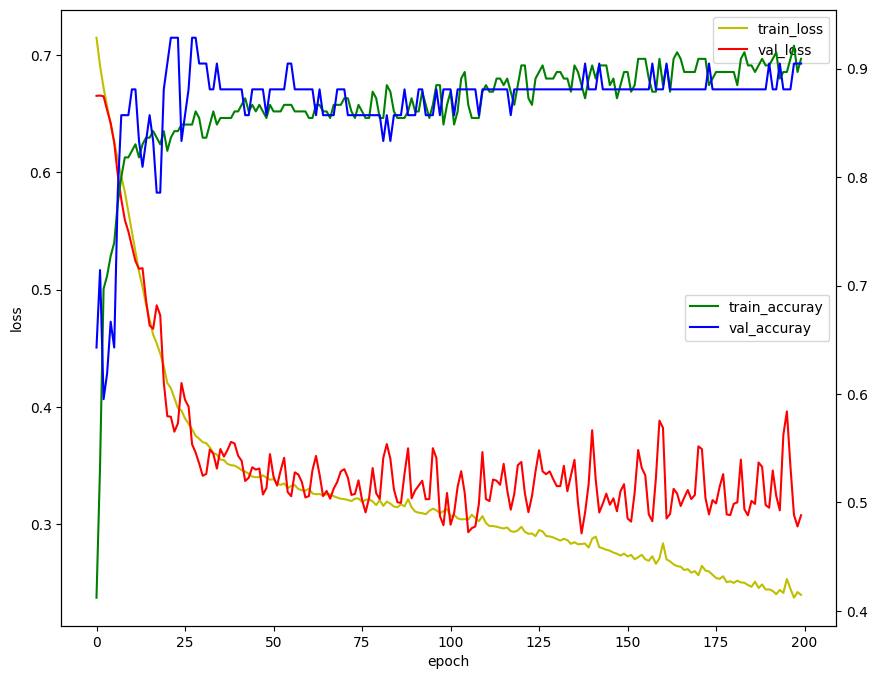

In [93]:
import matplotlib.pyplot as plt
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuray')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuray')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')
loss_ax.legend(loc='upper right')
acc_ax.legend(loc='center right')
plt.show()

In [95]:
# Dropout 추가해보기
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                448       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_25 (Dense)            (None, 2)                

In [96]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

In [97]:
hist = model.fit(x_train, Y_train, epochs=200, validation_split=0.2)

Epoch 1/200
6/6 [==============================] - 1s 39ms/step - loss: 0.7100 - accuracy: 0.4788 - precision_4: 0.4788 - recall_4: 0.4788 - val_loss: 0.6981 - val_accuracy: 0.4286 - val_precision_4: 0.4286 - val_recall_4: 0.4286
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6924 - accuracy: 0.5394 - precision_4: 0.5394 - recall_4: 0.5394 - val_loss: 0.6842 - val_accuracy: 0.5000 - val_precision_4: 0.5000 - val_recall_4: 0.5000
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6455 - accuracy: 0.6242 - precision_4: 0.6242 - recall_4: 0.6242 - val_loss: 0.6690 - val_accuracy: 0.4762 - val_precision_4: 0.4762 - val_recall_4: 0.4762
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6182 - precision_4: 0.6182 - recall_4: 0.6182 - val_loss: 0.6527 - val_accuracy: 0.5476 - val_precision_4: 0.5476 - val_recall_4: 0.5476
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6441 - acc

Epoch 37/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4432 - accuracy: 0.8242 - precision_4: 0.8242 - recall_4: 0.8242 - val_loss: 0.3865 - val_accuracy: 0.9286 - val_precision_4: 0.9286 - val_recall_4: 0.9286
Epoch 38/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4024 - accuracy: 0.8303 - precision_4: 0.8303 - recall_4: 0.8303 - val_loss: 0.3742 - val_accuracy: 0.9286 - val_precision_4: 0.9286 - val_recall_4: 0.9286
Epoch 39/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4224 - accuracy: 0.8242 - precision_4: 0.8242 - recall_4: 0.8242 - val_loss: 0.3568 - val_accuracy: 0.9286 - val_precision_4: 0.9286 - val_recall_4: 0.9286
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4768 - accuracy: 0.8061 - precision_4: 0.8061 - recall_4: 0.8061 - val_loss: 0.3433 - val_accuracy: 0.9286 - val_precision_4: 0.9286 - val_recall_4: 0.9286
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4332 -

Epoch 73/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3744 - accuracy: 0.8364 - precision_4: 0.8364 - recall_4: 0.8364 - val_loss: 0.3253 - val_accuracy: 0.9286 - val_precision_4: 0.9286 - val_recall_4: 0.9286
Epoch 74/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3862 - accuracy: 0.8545 - precision_4: 0.8545 - recall_4: 0.8545 - val_loss: 0.3193 - val_accuracy: 0.9286 - val_precision_4: 0.9286 - val_recall_4: 0.9286
Epoch 75/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3646 - accuracy: 0.8667 - precision_4: 0.8667 - recall_4: 0.8667 - val_loss: 0.3131 - val_accuracy: 0.9286 - val_precision_4: 0.9286 - val_recall_4: 0.9286
Epoch 76/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3708 - accuracy: 0.8242 - precision_4: 0.8242 - recall_4: 0.8242 - val_loss: 0.3020 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3660 -

6/6 [==============================] - 0s 6ms/step - loss: 0.3458 - accuracy: 0.8667 - precision_4: 0.8667 - recall_4: 0.8667 - val_loss: 0.2864 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 109/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3504 - accuracy: 0.8545 - precision_4: 0.8545 - recall_4: 0.8545 - val_loss: 0.2920 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 110/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3296 - accuracy: 0.8606 - precision_4: 0.8606 - recall_4: 0.8606 - val_loss: 0.2933 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 111/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3141 - accuracy: 0.8606 - precision_4: 0.8606 - recall_4: 0.8606 - val_loss: 0.2984 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 112/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3558 - accuracy

6/6 [==============================] - 0s 6ms/step - loss: 0.3179 - accuracy: 0.8848 - precision_4: 0.8848 - recall_4: 0.8848 - val_loss: 0.3015 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 144/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3265 - accuracy: 0.8667 - precision_4: 0.8667 - recall_4: 0.8667 - val_loss: 0.3155 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 145/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3131 - accuracy: 0.8788 - precision_4: 0.8788 - recall_4: 0.8788 - val_loss: 0.3101 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 146/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3116 - accuracy: 0.8727 - precision_4: 0.8727 - recall_4: 0.8727 - val_loss: 0.3011 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 147/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy

6/6 [==============================] - 0s 6ms/step - loss: 0.2940 - accuracy: 0.8848 - precision_4: 0.8848 - recall_4: 0.8848 - val_loss: 0.3185 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 179/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3352 - accuracy: 0.8485 - precision_4: 0.8485 - recall_4: 0.8485 - val_loss: 0.3225 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 180/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2880 - accuracy: 0.8788 - precision_4: 0.8788 - recall_4: 0.8788 - val_loss: 0.3100 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3432 - accuracy: 0.8364 - precision_4: 0.8364 - recall_4: 0.8364 - val_loss: 0.3004 - val_accuracy: 0.9048 - val_precision_4: 0.9048 - val_recall_4: 0.9048
Epoch 182/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3238 - accuracy

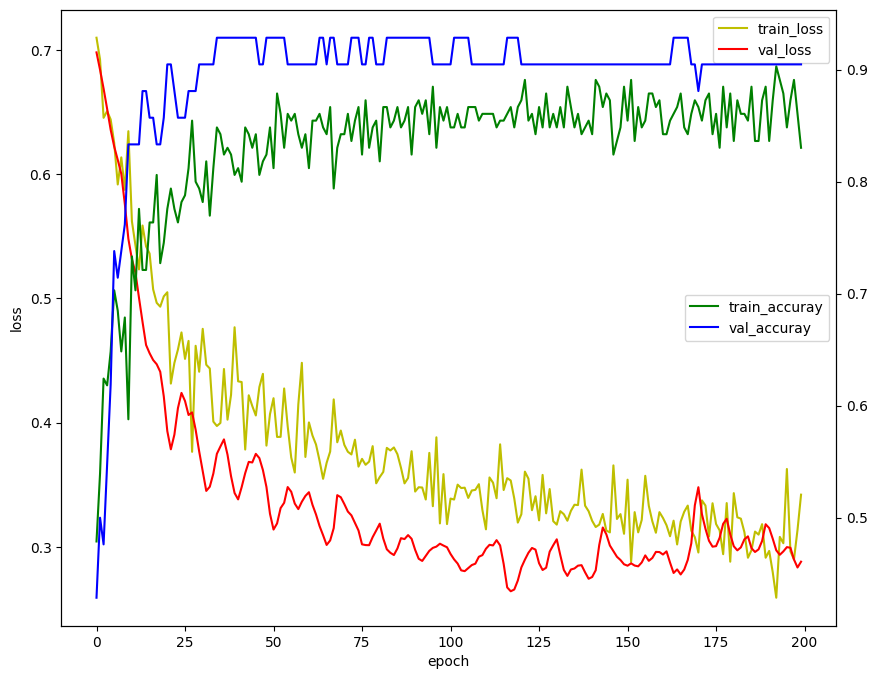

In [98]:
import matplotlib.pyplot as plt
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuray')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuray')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')
loss_ax.legend(loc='upper right')
acc_ax.legend(loc='center right')
plt.show()
# 과적합이 해소되는것이 보임

## 4. 모델평가

In [106]:
score = model.evaluate(x_test, Y_test)
print('model loss :', score[0])
print('model accuracy :', score[1])
print('model precision :', score[2])
print('model recall :', score[3])

3/3 [==============================] - 0s 1ms/step - loss: 0.5220 - accuracy: 0.8202 - precision_4: 0.8202 - recall_4: 0.8202
model loss : 0.5219897627830505
model accuracy : 0.8202247023582458
model precision : 0.8202247023582458
model recall : 0.8202247023582458


In [109]:
y_hat = model.predict(x_test).argmax(axis=1)
y_hat

3/3 [==============================] - 0s 1ms/step


array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1], dtype=int64)

In [110]:
# confusion matrix
confusion_matrix(y_test, y_hat)

array([[42,  6],
       [10, 31]], dtype=int64)